In [1]:
import numpy as np
from typing import List
from services.TSP import TSP
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
def generate_metric_graph(N: int) -> List[List[float]]:
    points = np.random.uniform(0, 20, (N, 2))
    graph = [[0 for _ in range(N)] for _ in range(N)]
    for i in range(N):
        for j in range(N):
            graph[i][j] = np.linalg.norm(points[i]-points[j])
    return graph

100%|██████████| 200/200 [01:52<00:00,  1.78it/s]


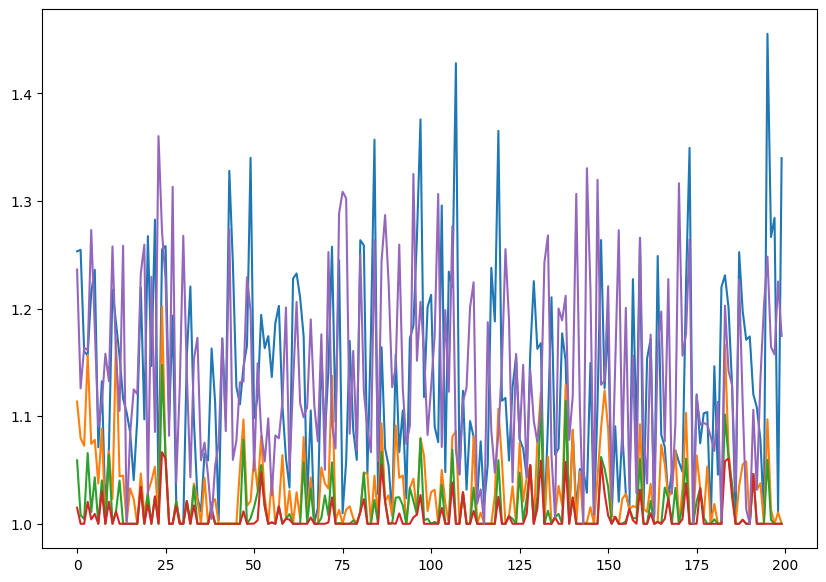

In [4]:
n = 200

alg_1 = []
alg_2 = []
alg_3 = []
alg_4 = []
alg_5 = []

for exp in tqdm(range(n)):
    N = 13
    graph = generate_metric_graph(N)
    node_weights = [1 for _ in range(N)]
    tsp = TSP(graph, node_weights)
    
    _, cost_p, time_p = tsp.perfect()
    
    _, cost_1, time_1 = tsp.shortest_distance_first(0)
    _, cost_2, time_2 = tsp.shortest_distance_first_combination()
    _, cost_3, time_3 = tsp.two_edge_switch(2)
    _, cost_4, time_4 = tsp.three_edge_switch(1)
    _, cost_5, time_5 = tsp.approximation_1_5()
    
    alg_1.append(cost_1/cost_p)
    alg_2.append(cost_2/cost_p)
    alg_3.append(cost_3/cost_p)
    alg_4.append(cost_4/cost_p)
    alg_5.append(cost_5/cost_p)

plt.figure(figsize=(10, 7))
plt.plot(alg_1)
plt.plot(alg_2)
plt.plot(alg_3)
plt.plot(alg_4)
plt.plot(alg_5)
plt.show()

In [5]:
alg_1 = np.array(alg_1)
alg_2 = np.array(alg_2)
alg_3 = np.array(alg_3)
alg_4 = np.array(alg_4)
alg_5 = np.array(alg_5)

In [7]:
alg_1.mean(), alg_2.mean(), alg_3.mean(), alg_4.mean(), alg_5.mean()

(1.132470260745397,
 1.0337516793975425,
 1.015087255715492,
 1.0074517708769657,
 1.1398760105174182)